In [106]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os


In [115]:
def generate_paths(compounds, window, replicas,ftype):
    paths = []
    path_1 = '/home/arasouli/repos/alchemical/rna_small_molecule_FE'
    path_2 = '3-55NaCl_Mg'
    if ftype == 'prmtop':
        path_3 = '1-sys_prep/box.prmtop'
    elif ftype == 'dcd':
        path_3 = '2-sim_run/equ_2/equ.0.dcd'

    for compound in compounds:
        for i in range(1, replicas + 1):
            path = os.path.join(path_1, compound, path_2, window, f"{i}-rep{i}", path_3)
            paths.append(path)
    return paths


In [77]:
# List of filenames of the first set of DCD files for TIP3P
compounds = ['2-theophylline', '3-1_methylxanthine', '4-3_methylxanthine', '5-hypoxanthine', '6-xanthine', '7-caffeine']

prmtop_1 = generate_paths(compounds,'1-40winCmplx_30winLig',3,'prmtop')
prmtop_2 = generate_paths(compounds,'6-opc_40winCmplx_30winLig',3,'prmtop')

dcds_1 = generate_paths(compounds,'1-40winCmplx_30winLig',3,'dcd')
dcds_2 = generate_paths(compounds,'6-opc_40winCmplx_30winLig',3,'dcd')


# Load all the DCD files from the first set into a list of universes
universes1 = [mda.Universe(prmtop, filename) for filename, prmtop in zip(dcds_1,prmtop_1)]

# Load all the DCD files from the second set into a list of universes
universes2 = [mda.Universe(prmtop, filename) for filename, prmtop in zip(dcds_2,prmtop_2)]

# Combine all the frames from all the universes from the first set into one list
frames1 = []
for universe in universes1:
    for ts in universe.trajectory[0::200]:
        rna = universe.select_atoms("nucleicbackbone")
        frames1.append(rna.positions)
        
    
# Combine all the frames from all the universes from the second set into one list
frames2 = []
for universe in universes2:
    for ts in universe.trajectory[0::200]:
        rna = universe.select_atoms("nucleicbackbone")
        frames2.append(rna.positions)
        
        
# Combine all the frames from both sets into one list
all_frames = frames1 + frames2

# Combine all the positions from all the frames into one array
all_positions = np.concatenate(all_frames)


/opt/install/conda/lib/python3.10/site-packages/MDAnalysis/topology/TOPParser.py:295: UserWarning: Unknown ATOMIC_NUMBER value found for some atoms, these have been given an empty element record. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(msg)


In [78]:
# Perform PCA on the combined positions
pca = PCA(n_components=2)
pca.fit(all_positions)

# Project all the positions onto the first two principal components
pc_projections = pca.transform(all_positions)

# Divide the projections into separate arrays for each set
set1_projections = pc_projections[:len(frames1)*len(frames1[0])]
set2_projections = pc_projections[len(frames1)*len(frames1[0]):]

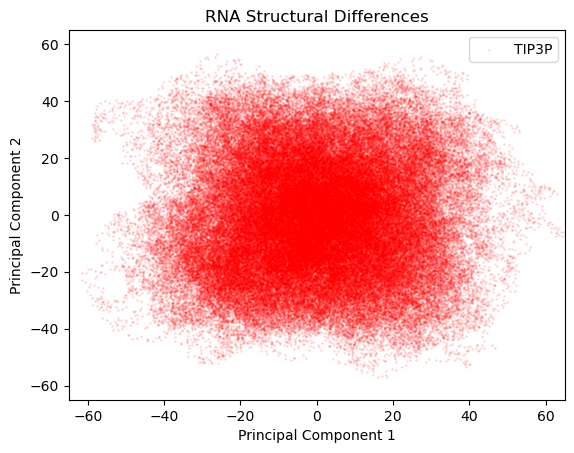

In [87]:
# Plot the projections in the PCA space
plt.scatter(set1_projections[:, 0], set1_projections[:, 1], alpha=.1, s=1, color='red', label='TIP3P')
# plt.scatter(set2_projections[:, 0], set2_projections[:, 1], alpha=.1, s=1, color='blue', label='OPC')
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.xlim(-65,65)
plt.ylim(-65,65)
plt.title("RNA Structural Differences")
plt.savefig(f"./figs/PCA_TIP3P.pdf", bbox_inches='tight')
plt.show()

/opt/install/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


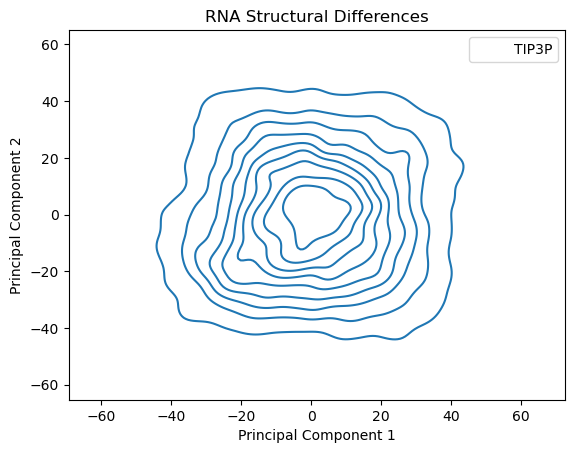

In [91]:
import seaborn as sns
# Plot the projections in the PCA space
sns.kdeplot(set1_projections[:, 0], set1_projections[:, 1], label='TIP3P')
# plt.scatter(set2_projections[:, 0], set2_projections[:, 1], alpha=.1, s=1, color='blue', label='OPC')
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.title("RNA Structural Differences")
# plt.savefig(f"./figs/PCA_TIP3P.pdf", bbox_inches='tight')
plt.show()

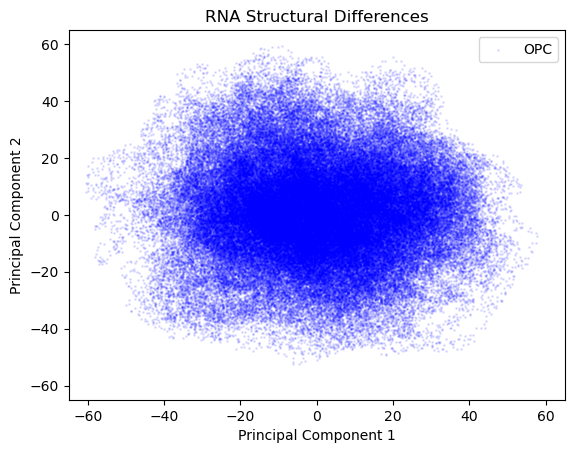

In [88]:
# Plot the projections in the PCA space
plt.scatter(set2_projections[:, 0], set2_projections[:, 1], alpha=.1, s=1, color='blue', label='OPC')
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.xlim(-65,65)
plt.ylim(-65,65)
plt.title("RNA Structural Differences")
plt.savefig(f"./figs/PCA_OPC.pdf", bbox_inches='tight')
plt.show()

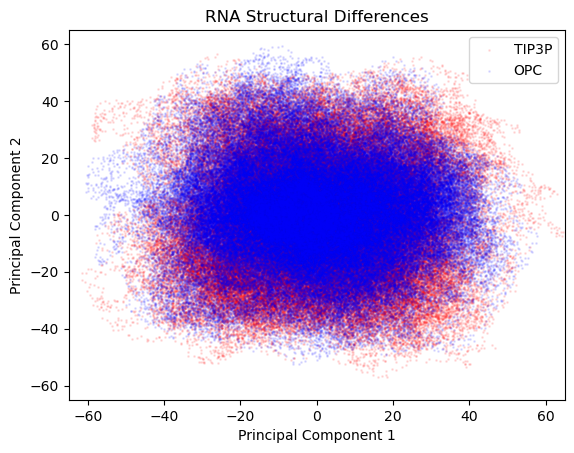

In [89]:
# Plot the projections in the PCA space
plt.scatter(set1_projections[:, 0], set1_projections[:, 1], alpha=.1, s=1, color='red', label='TIP3P')
plt.scatter(set2_projections[:, 0], set2_projections[:, 1], alpha=.1, s=1, color='blue', label='OPC')
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.xlim(-65,65)
plt.ylim(-65,65)
plt.title("RNA Structural Differences")
plt.savefig(f"./figs/PCA_TIP3P_OPC.pdf", bbox_inches='tight')
plt.show()


/opt/install/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/install/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


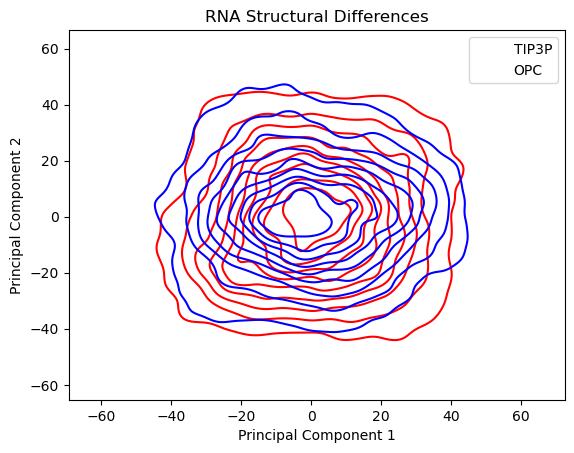

In [93]:
# Plot the projections in the PCA space
sns.kdeplot(set1_projections[:, 0], set1_projections[:, 1], color='red',label='TIP3P')
sns.kdeplot(set2_projections[:, 0], set2_projections[:, 1], color='blue',label='OPC')
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
# plt.xlim(-65,65)
# plt.ylim(-65,65)
plt.title("RNA Structural Differences")
# plt.savefig(f"./figs/PCA_TIP3P_OPC.pdf", bbox_inches='tight')
plt.show()


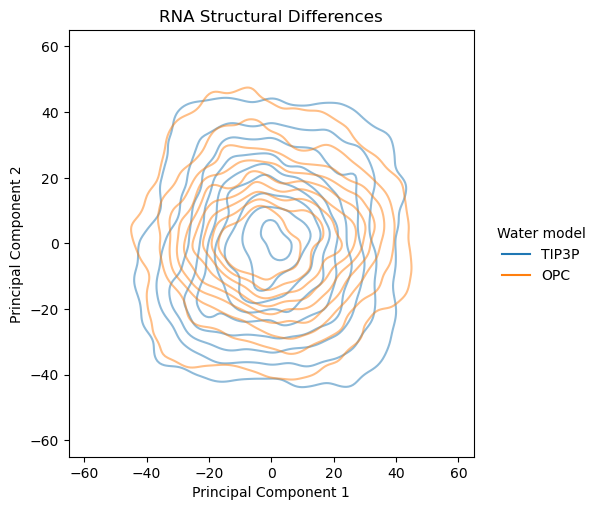

In [99]:
import pandas as pd
# from matplotlib.axes import Axes

df = pd.DataFrame()

for name, data in zip(['TIP3P', 'OPC'], [set1_projections, set2_projections]):
    temp = pd.DataFrame({'PC1': data[:,0], 'PC2': data[:,1]})
    temp['Water model'] = name
    df = pd.concat([df, temp]).reset_index(drop=True)
    

sns.displot(data=df, x='PC1', y='PC2', hue='Water model', alpha=.5, kind='kde')

for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(True)
    
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.xlim(-65,65)
plt.ylim(-65,65)
plt.title("RNA Structural Differences")
plt.savefig(f"./figs/PCA_TIP3P_OPC_KDE.pdf", bbox_inches='tight')
plt.show()